In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
half_life_U238 = 4.468e9  # years
half_life_U235 = 0.704e9  # years

lambda_U238 = np.log(2) / half_life_U238
lambda_U235 = np.log(2) / half_life_U235

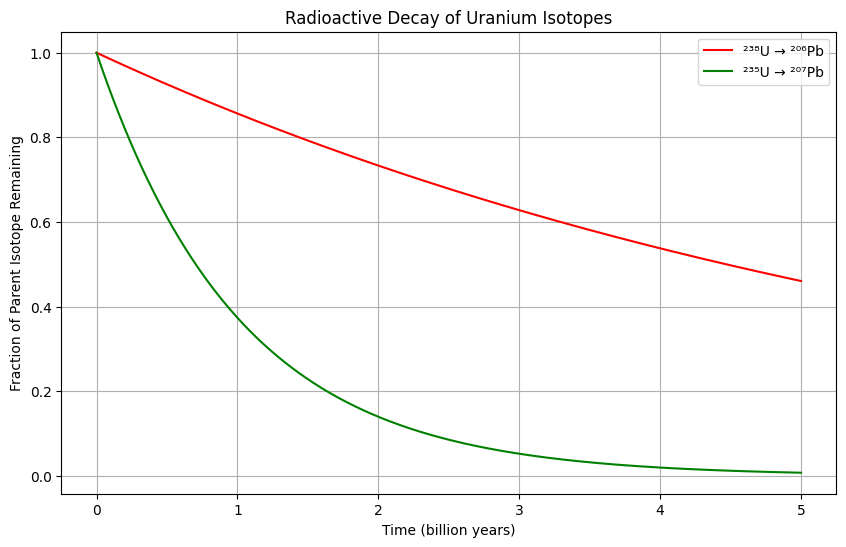

In [6]:
# Time array from 0 to 5 billion years
t = np.linspace(0, 5e9, 1000)

# Initial quantity of isotopes
N0 = 1.0

# Decay law
N_U238 = N0 * np.exp(-lambda_U238 * t)
N_U235 = N0 * np.exp(-lambda_U235 * t)

# Plot decay
plt.figure(figsize=(10, 6))
plt.plot(t / 1e9, N_U238, label='²³⁸U → ²⁰⁶Pb', color='red')
plt.plot(t / 1e9, N_U235, label='²³⁵U → ²⁰⁷Pb', color='green')
plt.xlabel('Time (billion years)')
plt.ylabel('Fraction of Parent Isotope Remaining')
plt.title('Radioactive Decay of Uranium Isotopes')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Age Calculation
def calculate_age(Pb_U_ratio, decay_constant):
    return (1 / decay_constant) * np.log(1 + Pb_U_ratio)

# Example Pb/U ratios
Pb206_U238_ratio = 0.85
Pb207_U235_ratio = 1.65

# Age estimations
age_U238 = calculate_age(Pb206_U238_ratio, lambda_U238)
age_U235 = calculate_age(Pb207_U235_ratio, lambda_U235)

print(f"Estimated age using ²³⁸U: {age_U238/1e9:.2f} billion years")
print(f"Estimated age using ²³⁵U: {age_U235/1e9:.2f} billion years")

Estimated age using ²³⁸U: 3.97 billion years
Estimated age using ²³⁵U: 0.99 billion years


In [5]:
# Basic Error Analysis
# Assume small uncertainty in ratio measurement (e.g. ±5%)
Pb206_U238_ratio_err = 0.05 * Pb206_U238_ratio
Pb207_U235_ratio_err = 0.05 * Pb207_U235_ratio

age_U238_high = calculate_age(Pb206_U238_ratio + Pb206_U238_ratio_err, lambda_U238)
age_U238_low = calculate_age(Pb206_U238_ratio - Pb206_U238_ratio_err, lambda_U238)

age_U235_high = calculate_age(Pb207_U235_ratio + Pb207_U235_ratio_err, lambda_U235)
age_U235_low = calculate_age(Pb207_U235_ratio - Pb207_U235_ratio_err, lambda_U235)

print(f"²³⁸U age range: {age_U238_low/1e9:.2f} - {age_U238_high/1e9:.2f} billion years")
print(f"²³⁵U age range: {age_U235_low/1e9:.2f} - {age_U235_high/1e9:.2f} billion years")

²³⁸U age range: 3.82 - 4.11 billion years
²³⁵U age range: 0.96 - 1.02 billion years
